In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import multivariate_normal
pd.set_option('display.max_columns', None)  


In [18]:
mypath = 'Datasets/Gaze10minData/'
mydtaframes = {}

for index,files in enumerate(os.listdir(mypath)):
    mydtaframes["df_{}".format(index)] = pd.read_excel('{}/{}'.format(mypath, files),
                                                         sheet_name= 'Sheet1')

In [19]:
mydtaframes['df_1'].head()

,ParticipantName,RecordingDuration,RecordingTimestamp,LocalTimeStamp,EyeTrackerTimestamp,MouseEventIndex,MouseEventX (MCSpx),MouseEventY (MCSpx),KeyPressEventIndex,StudioEventIndex,StudioEventIndex_B,StudioEvent,StudioEvent_B,FixationIndex,SaccadeIndex,GazeEventType,GazeEventType_B,GazeEventDuration,FixationPointX (MCSpx),FixationPointY (MCSpx),AbsoluteSaccadicDirection,RelativeSaccadicDirection,GazePointIndex,GazePointX (MCSpx),GazePointY (MCSpx),PupilLeft,PupilRight,ValidityLeft,ValidityRight,StudioEventTypeDiff,GazeEventTypeDiff
0,Proband_31_D2,2895701,440,13:25:24.097,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,NaN,2.0,Saccade,Saccade,133,NaN,NaN,NaN,NaN,21.0,66.0,220.0,"2,74","2,59",0.0,0.0,Agree_0_unstated,Agree_Saccade
1,Proband_31_D2,2895701,456,13:25:24.114,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,NaN,2.0,Saccade,Saccade,133,NaN,NaN,NaN,NaN,22.0,20.0,166.0,"2,59","2,54",0.0,0.0,Agree_0_unstated,Agree_Saccade
2,Proband_31_D2,2895701,473,13:25:24.131,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,23.0,20.0,168.0,NaN,"2,62",4.0,0.0,Agree_0_unstated,Agree_Fixation
3,Proband_31_D2,2895701,490,13:25:24.147,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,24.0,36.0,171.0,"2,58","2,50",0.0,0.0,Agree_0_unstated,Agree_Fixation
4,Proband_31_D2,2895701,506,13:25:24.164,1.458043e+15,NaN,NaN,NaN,NaN,NaN,NaN,0_unstated,0_unstated,2.0,NaN,Fixation,Fixation,200,45.0,168.0,"339,44",NaN,25.0,66.0,224.0,"2,74","2,60",0.0,0.0,Agree_0_unstated,Agree_Fixation


In [20]:
studiodf = {}

for index,frames in enumerate(mydtaframes):
    studiodf["{}".format(index)] = mydtaframes[frames]
    #studiodf["{}".format(index)] = mydtaframes[frames].loc[(mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_1_Scanning") | (mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_2_Skimming") | (mydtaframes[frames]['StudioEventTypeDiff'] == "Agree_3_Reading"),['LocalTimeStamp','FixationPointX (MCSpx)','FixationPointY (MCSpx)','StudioEventTypeDiff']]
# studiodf = df1.loc[(df1['StudioEventTypeDiff'] == "Agree_1_Scanning") | (df1['StudioEventTypeDiff'] == "Agree_2_Skimming") | (df1['StudioEventTypeDiff'] == "Agree_3_Reading"),['LocalTimeStamp','FixationPointX (MCSpx)','FixationPointY (MCSpx)','StudioEventTypeDiff']]
# studiodf.head()

In [21]:
len(studiodf)

20

In [22]:
for frames in studiodf:
    studiodf[frames].fillna(method='ffill', inplace= True)

In [7]:

allData = pd.concat([studiodf['0'],studiodf['1'],studiodf['2'],studiodf['3'],studiodf['4'],studiodf['5'],
                    studiodf['6'],studiodf['7'],studiodf['8'],studiodf['9'],studiodf['10'],studiodf['11'],
                    studiodf['12'],studiodf['13'],studiodf['14'],studiodf['15'],studiodf['16'],studiodf['17'],
                    studiodf['18'],studiodf['19'],], sort = False)
allData['FixationPointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData['FixationPointY (MCSpx)'].fillna(method='bfill', inplace= True)

In [16]:
allData['FixationPointX (MCSpx)'] = allData['FixationPointX (MCSpx)'].diff()
allData['FixationPointY (MCSpx)'] = allData['FixationPointY (MCSpx)'].diff()
allData['FixationPointX (MCSpx)'].fillna(method='bfill', inplace= True)
allData['FixationPointY (MCSpx)'].fillna(method='bfill', inplace= True)


In [42]:
import matplotlib.pyplot as plt

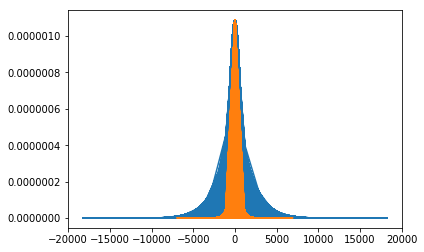

In [43]:
plt.plot(data,y)

In [27]:
readingData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_1_Scanning"]
skimmingData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_2_Skimming"]
scanningData = allData.loc[allData['StudioEventTypeDiff'] == "Agree_3_Reading"]

In [28]:
readCovMat = np.cov((readingData['FixationPointX (MCSpx)'],readingData['FixationPointY (MCSpx)']))
skimmingCovMat = np.cov((skimmingData['FixationPointX (MCSpx)'],skimmingData['FixationPointY (MCSpx)']))
scanningCovMat = np.cov((scanningData['FixationPointX (MCSpx)'],scanningData['FixationPointY (MCSpx)']))

In [29]:
readingMeanx = readingData['FixationPointX (MCSpx)'].mean()
readingMeany = readingData['FixationPointY (MCSpx)'].mean()
readingMeanVector = [readingMeanx,readingMeany]

skimmingMeanx = skimmingData['FixationPointX (MCSpx)'].mean()
skimmingMeany = skimmingData['FixationPointY (MCSpx)'].mean()
skimmingMeanVector = [skimmingMeanx,skimmingMeany]

scanningMeanx = scanningData['FixationPointX (MCSpx)'].mean()
scanningMeany = scanningData['FixationPointY (MCSpx)'].mean()
scanningMeanVector = [scanningMeanx,scanningMeany]


In [37]:
scanningMeanVector

[-0.09484939193443274, -0.011586935150718522]

In [30]:
readingPassData = readingData[['FixationPointX (MCSpx)','FixationPointY (MCSpx)']]
skimmingPassData = skimmingData[['FixationPointX (MCSpx)','FixationPointY (MCSpx)']]
scanningPassData = scanningData[['FixationPointX (MCSpx)','FixationPointY (MCSpx)']]

In [31]:
readPdf = multivariate_normal.pdf(readingPassData, mean=readingMeanVector, cov=readCovMat)
skimmingPdf = multivariate_normal.pdf(skimmingPassData, mean=skimmingMeanVector, cov=skimmingCovMat)
scanningPdf = multivariate_normal.pdf(scanningPassData, mean=scanningMeanVector, cov=scanningCovMat)

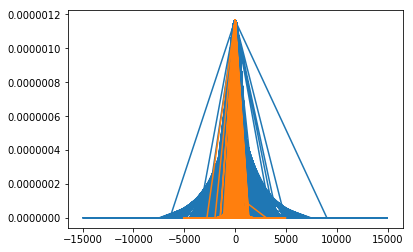

In [32]:
plt.plot(readingPassData,readPdf)

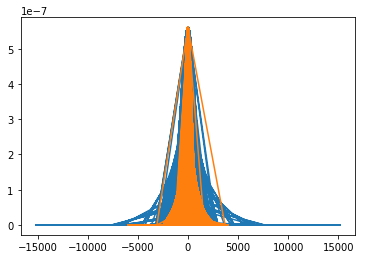

In [33]:
plt.plot(skimmingPassData,skimmingPdf)

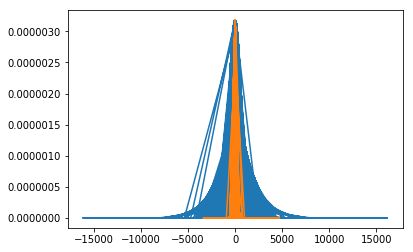

In [34]:
plt.plot(scanningPassData,scanningPdf)

In [23]:
from hidden_markov import hmm

In [28]:
states = ('Scanning','Skimming','Reading')
observations = ('FixationPointX (MCSpx)','FixationPointY (MCSpx)','GazeEventType')
start_probability = np.matrix('0 0 1')
transition_probability = np.matrix('0.2 0.3 0.5; 0.3 0.6 0.1; 0.5 0.2 0.3')
emission_pprobability = np.matrix('0.1 0.4 0.5; 0.6 0.1 0.3; 0.1 0.7 0.2')
test = hmm(states, observations, start_probability, transition_probability, emission_pprobability)

obs = ('FixationPointX (MCSpx)','FixationPointX (MCSpx)','GazeEventType')

In [29]:
test.viterbi(obs)

['Reading', 'Skimming', 'Skimming']